#### Imports
Initially, we need to import standard libraries, such as pandas and numpy

In [3]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

dataset = pd.read_excel("./dataset.xlsx")

dataset

,Numbers adv,Health advantage,Average Weapon Cost,Time Pressure,Ults in use,Ults available,Result
0,0,-128,680.0,-51,0,-1,0
1,0,-50,-1400.0,-6,-1,2,0
2,4,364,1470.0,67,0,0,1
3,2,302,-1300.0,27,0,0,1
4,1,325,2622.5,21,0,1,1
5,0,30,2187.5,36,0,0,1
6,2,325,-240.0,13,1,0,1
7,4,600,360.0,25,1,1,1
8,0,125,2940.0,7,-1,-1,1
9,1,200,1445.0,19,-1,-1,0


#### Fitting the model
Here we will split the data into training and testing sets, and then fit the model

In [32]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,-1].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=10, shuffle = False)

# Fitting the model with the training data
model = LogisticRegression(max_iter = 1000).fit(X_train, Y_train)

#### Test
We will test the performance of the model against the test (validation) data.

In [33]:
prediction = model.predict(X_test)
print(prediction)
print(Y_test)

model.score(X_test, Y_test)

[0 0 0 0 0 0 1 1 1 0]
[0 1 0 0 0 0 0 1 1 1]


0.7

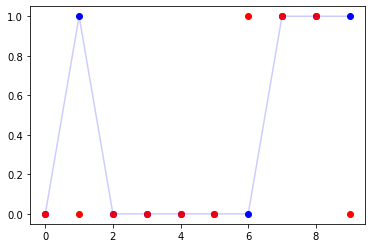

In [53]:
from matplotlib import pyplot as plt

linspace = np.arange(0, 10)
plt.scatter(linspace, Y_test, color = "blue")
plt.plot(linspace, Y_test, color = "blue", label = "Actual results", alpha = 0.2)

plt.scatter(linspace, prediction, color = "red")
plt.plot(linspace, prediction, color = "red", label = "Predicted results")


plt.legend(loc = "upper left")
plt.show()